In [27]:
import numpy as np
import nibabel as nib
import os
import matplotlib.pyplot as plt
import torch
import monai
from monai.transforms import *
from monai.utils import set_determinism
from monai.data import Dataset, PatchIterd, GridPatchDataset, CacheDataset, PersistentDataset, DataLoader
import sys
import psutil
from copy import deepcopy
device = f'cpu'

In [28]:
path_X = '/mnt/volume1/hecktor_2022/hecktor2022/imagesTr'
path_Y = '/mnt/volume1/hecktor_2022/hecktor2022/labelsTr'
files_Y = sorted(os.listdir(path_Y))

filenames = []
for file_Y in files_Y:
    file_CT = file_Y.split('.')[0]+'__CT.nii.gz'
    file_PT = file_Y.split('.')[0]+'__PT.nii.gz'
    file_GT = file_Y
    filenames.append({'CT':f'{path_X}/{file_CT}',
                      'PT':f'{path_X}/{file_PT}',
                      'GT':f'{path_Y}/{file_GT}'})

In [40]:
fn_keys = ['CT', 'PT', 'GT']

transform= Compose([LoadImaged(fn_keys, image_only=True),
                    CastToTyped('GT', dtype=torch.long),
                          ])

Look at the first 20 images for now

In [41]:
data=transform(filenames[:20])

In [42]:
GTs = [d['GT'].numpy() for d in data]
ratio_1 = [np.sum(GT==1)/GT.size for GT in GTs]
ratio_2 = [np.sum(GT==2)/GT.size for GT in GTs]

(array([5., 4., 6., 1., 1., 1., 0., 0., 1., 1.]),
 array([0.00000000e+00, 5.57766685e-05, 1.11553337e-04, 1.67330006e-04,
        2.23106674e-04, 2.78883343e-04, 3.34660011e-04, 3.90436680e-04,
        4.46213348e-04, 5.01990017e-04, 5.57766685e-04]),
 <BarContainer object of 10 artists>)

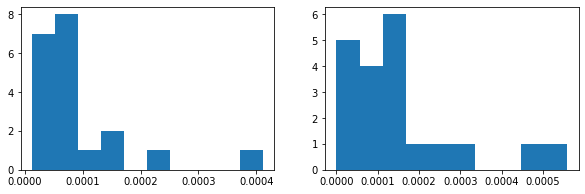

In [43]:
plt.subplots(1,2,figsize=(10,3))
plt.subplot(121)
plt.hist(ratio_1)
plt.subplot(122)
plt.hist(ratio_2)